<a href="https://colab.research.google.com/github/vijayshankarrealdeal/GoogleColab/blob/main/GLoveVector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget 'https://nlp.stanford.edu/data/glove.6B.zip'

glove.6B.zip        100%[===================>] 822.24M  5.02MB/s    in 2m 40s  

2021-08-24 08:46:49 (5.14 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



In [3]:
!unzip '/content/glove.6B.zip' -d '/content/'

Archive:  /content/glove.6B.zip
  inflating: /content/glove.6B.50d.txt  
  inflating: /content/glove.6B.100d.txt  
  inflating: /content/glove.6B.200d.txt  
  inflating: /content/glove.6B.300d.txt  


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [98]:
word2vec = {}
with open('/content/glove.6B.50d.txt') as f:
  for line in f:
    line = line.split(' ')
    word = line[0]
    arr = np.asarray(line[1:],dtype='float32')
    word2vec[word] = arr

In [99]:
def compute_length(a):
    return np.linalg.norm(a, axis=a.ndim-1)

In [100]:
def get_cosine_sim(u,v):
  cosine_sim = np.dot(u,v) / ( compute_length(u) + compute_length(v) )
  return cosine_sim

In [117]:
def nearest_(intial):
  near = sorted(word2vec.keys(),key=lambda word:np.linalg.norm((word2vec[word]- intial)))
  return near

In [124]:
nearest_(word2vec['google'])[0:10]

['google',
 'yahoo',
 'aol',
 'microsoft',
 'facebook',
 'web',
 'ebay',
 'netscape',
 'internet',
 'msn']

In [126]:
nearest_(word2vec['boy'] + word2vec['girl'])[0:10]

['girl',
 'boy',
 'woman',
 'mother',
 'her',
 'man',
 'girls',
 'she',
 'baby',
 'child']

In [127]:
from sklearn.manifold import TSNE

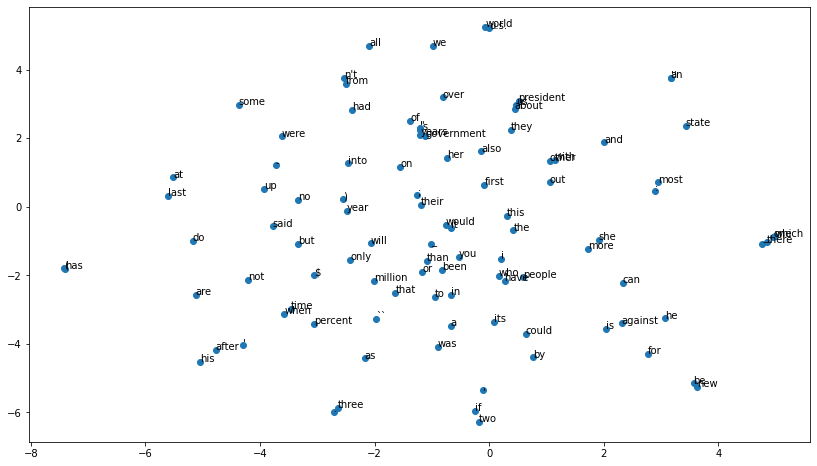

In [131]:
distri = TSNE(n_components=2)
words = list(word2vec.keys())
vectors = [word2vec[word] for word in words]
y = distri.fit_transform(vectors[700:800])
plt.figure(figsize=(14,8))
plt.scatter(y[:, 0],y[:,1])
for label,x,y in zip(words,y[:, 0],y[:,1]):
  plt.annotate(label,xy=(x,y),xytext=(0,0),textcoords='offset points')
plt.show()